<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/My Drive/Asgn/FB/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/My Drive/Asgn/FB/storage_sample_stage4.h5', 'test_df',mode='r')

In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9178316720409213 test Score 0.8686841930997947
Estimators =  50 Train Score 0.9258785808587774 test Score 0.9079426247056305
Estimators =  100 Train Score 0.9263951418699614 test Score 0.9134703439463315
Estimators =  250 Train Score 0.9241129782806471 test Score 0.9134907000911963
Estimators =  450 Train Score 0.9250669232056216 test Score 0.914323281163846


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

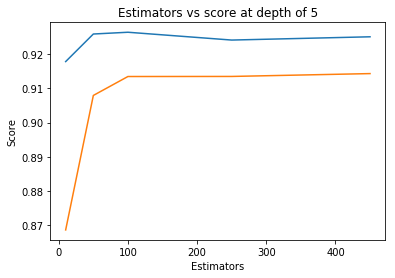

In [0]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8923620606239088 test Score 0.8617670700180313
depth =  9 Train Score 0.9577622891431021 test Score 0.9187672688629117
depth =  11 Train Score 0.9603731502887229 test Score 0.9193359831657704
depth =  15 Train Score 0.9653596563385431 test Score 0.9212852771166271
depth =  20 Train Score 0.9649197643713182 test Score 0.9209088783556869
depth =  35 Train Score 0.9653365823941518 test Score 0.9211085607413075
depth =  50 Train Score 0.9653365823941518 test Score 0.9211085607413075
depth =  70 Train Score 0.9653365823941518 test Score 0.9211085607413075
depth =  130 Train Score 0.9653365823941518 test Score 0.9211085607413075


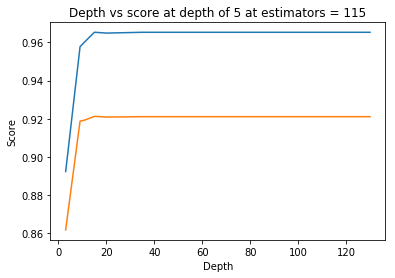

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96331023 0.96259747 0.96046294 0.96282183 0.9651594 ]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9658803321509518
Test f1 score 0.9223868540209604


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


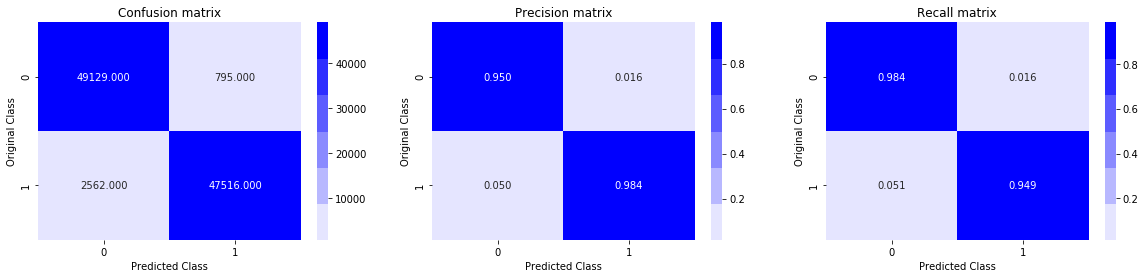

Test confusion_matrix


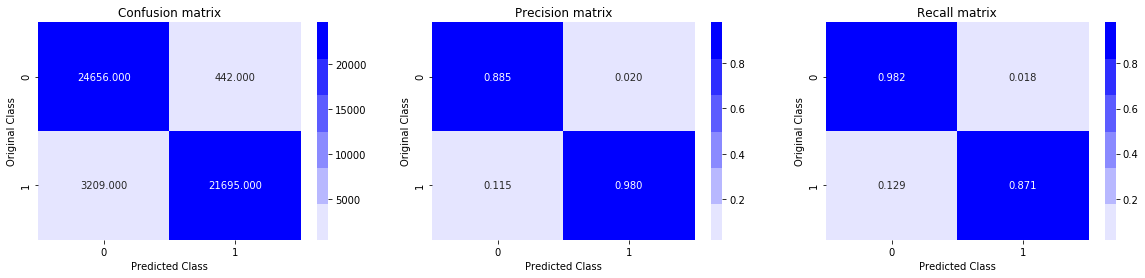

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

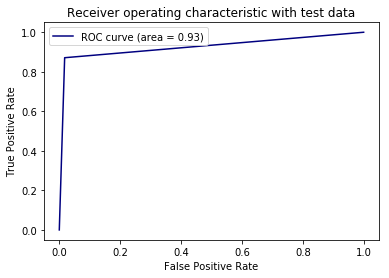

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

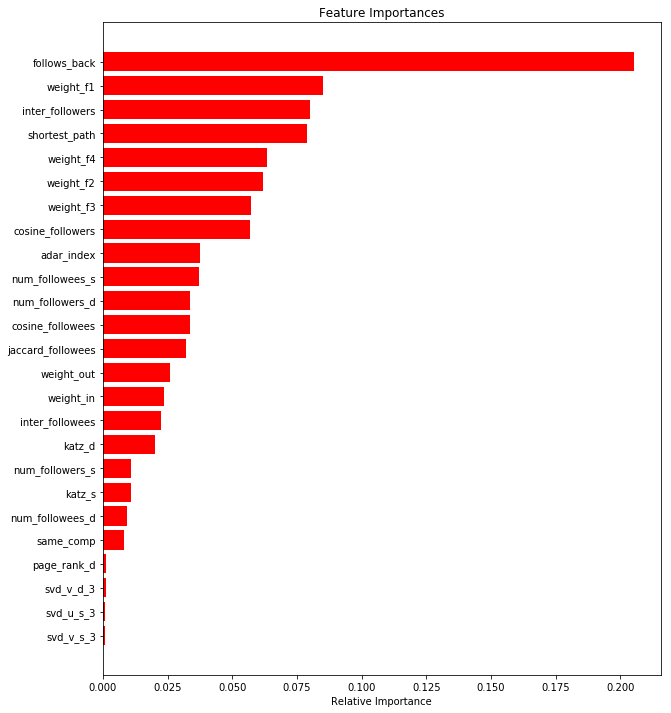

In [0]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_prediction.preferential_attachment.html

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

# **Preferential Attachment with followers and followees data of vertex**

In [0]:
#https://arxiv.org/pdf/1303.6271.pdf
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_prediction.preferential_attachment.html
#https://medium.com/@SeloSlav/preferential-attachment-and-consumer-surplus-2efc2e291c14

In [0]:
#Preferential Attachment: This method states that the probability that a new future edge involves node x is directly proportional to neighbors of x. In real world, it matches the idea – rich become richer. In other words, more the number of current friends, higher are the chances of making new friends in future. Hence, the preferential attachments score of two nodes x and y is calculated as:

#Score(x, y) = Nx × Ny
#where, Nx = neighbours of x    and   Ny = neighbours of y

In [0]:
#https://medium.com/@bgoncalves/network-effects-explained-pagerank-and-preferential-attachment-61fdf93d023a

In [0]:
#https://medium.com/@SeloSlav/preferential-attachment-and-consumer-surplus-2efc2e291c14

In [0]:
#https://stackoverflow.com/questions/6632445/common-neighbors-and-preferential-attachment-score-matrixes-using-igraph-for-pyt

In [0]:
#https://medium.com/@cynosuremishra01/different-featurization-techniques-for-graph-related-problems-in-machine-learning-9c9d60caae60

In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/My Drive/Asgn/FB/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/My Drive/Asgn/FB/storage_sample_stage4.h5', 'test_df',mode='r')

In [0]:
def pa_followers(a,b):
  
    try:
    
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
      
          return 0
    
        score = (len(set(train_graph.predecessors(a))*(set(train_graph.predecessors(b)))))
    
        return score
  
    except:
    
        return 0

In [0]:
def pa_followees(a,b):

    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
          
            return 0
          
        similarity = (len(set(train_graph.successors(a))))*(len(set(train_graph.successors(b))))
        
        return  similarity
  
    except:
    
       return 0

In [0]:
df_final_train['pa_followers'] = df_final_train.apply(lambda p:
                                            pa_followers(df_final_train['source_node'],df_final_train['destination_node']),axis=1)

In [0]:
df_final_test['pa_followers'] = df_final_test.apply(lambda p:
                                            pa_followers(df_final_train['source_node'],df_final_train['destination_node']),axis=1)

In [0]:
df_final_train['pa_followees'] = df_final_train.apply(lambda p:
                                            pa_followees(df_final_train['source_node'],df_final_train['destination_node']),axis=1)

In [0]:

df_final_test['pa_followees'] = df_final_test.apply(lambda p:
                                            pa_followees(df_final_train['source_node'],df_final_train['destination_node']),axis=1)

# **Dot product between source node svd and destination node svd features**

In [0]:
tru1 = np.dot(df_final_train['svd_u_s_1'],(df_final_train['svd_u_d_1']))+np.dot(df_final_train['svd_u_s_2'],(df_final_train['svd_u_d_2']))+np.dot(df_final_train['svd_u_s_3'],(df_final_train['svd_u_d_3']))+np.dot(df_final_train['svd_u_s_4'],(df_final_train['svd_u_d_4']))+np.dot(df_final_train['svd_u_s_5'],(df_final_train['svd_u_d_5']))+np.dot(df_final_train['svd_u_s_6'],(df_final_train['svd_u_d_6']))
tsv1 = np.dot(df_final_test['svd_u_s_1'],(df_final_test['svd_u_d_1']))+np.dot(df_final_test['svd_u_s_2'],(df_final_test['svd_u_d_2']))+np.dot(df_final_test['svd_u_s_3'],(df_final_test['svd_u_d_3']))+np.dot(df_final_test['svd_u_s_4'],(df_final_test['svd_u_d_4']))+np.dot(df_final_test['svd_u_s_5'],(df_final_test['svd_u_d_5']))+np.dot(df_final_test['svd_u_s_6'],(df_final_test['svd_u_d_6']))


In [0]:
trv2=np.dot(df_final_train['svd_v_s_1'],(df_final_train['svd_v_d_1']))+np.dot(df_final_train['svd_v_s_2'],(df_final_train['svd_v_d_2']))+np.dot(df_final_train['svd_v_s_3'],(df_final_train['svd_v_d_3']))+ np.dot(df_final_train['svd_v_s_4'],(df_final_train['svd_v_d_4']))+np.dot(df_final_test['svd_u_s_5'],(df_final_test['svd_u_d_5']))+np.dot(df_final_train['svd_v_s_6'],(df_final_train['svd_v_d_6']))

In [0]:
tsv2=np.dot(df_final_test['svd_v_s_1'],(df_final_test['svd_v_d_1']))+np.dot(df_final_test['svd_v_s_2'],(df_final_test['svd_v_d_2']))+np.dot(df_final_test['svd_v_s_3'],(df_final_test['svd_v_d_3']))+np.dot(df_final_test['svd_v_s_4'],(df_final_test['svd_v_d_4']))+np.dot(df_final_test['svd_v_s_5'],(df_final_test['svd_v_d_5']))+np.dot(df_final_test['svd_v_s_6'],(df_final_test['svd_v_d_6']))

In [0]:
df_final_train['svd_u_dot_tr']=tru1
df_final_train['svd_v_dot_tr']=tsv1
df_final_test['svd_u_dot_ts']=trv2
df_final_test['svd_V_dot_ts']=tsv2




In [16]:

df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pa_followers,pa_followees,svd_u_dot_tr,svd_v_dot_tr
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613532e-13,1.043033e-05,6.677483e-13,2.451076e-13,3.584763e-12,-2.038017e-11,5.397698e-13,1.068910e-06,1.192410e-12,2.279489e-12,3.581019e-12,-7.215979e-13,3.925711e-13,1.983553e-06,1.544969e-13,8.108180e-13,1.719626e-14,-1.355356e-12,4.675177e-13,1.128587e-06,6.616619e-14,9.771036e-13,4.159882e-14,0,0,3.229227,1.594284
1,365429,1523458,1,0,0.023077,0.007441,0.046761,40,85,49,84,4,3,2.073506,1,1,2,0.107833,0.141421,0.249254,0.015250,0.357087,0.390675,1.033022e-06,3.096856e-06,0.000911,0.001099,2.212482e-13,2.563941e-13,7.761986e-14,6.291902e-14,-1.780428e-10,2.951837e-11,4.043029e-05,2.138001e-11,8.232025e-11,4.081876e-12,-1.367537e-10,6.609226e-11,8.692406e-04,7.907818e-12,6.199507e-11,4.730290e-12,-1.032101e-09,1.107759e-11,6.897567e-05,3.664448e-11,6.554830e-10,1.446760e-12,-9.030714e-10,2.911185e-11,4.190047e-05,8.469393e-12,3.504062e-11,1.172748e-12,0,0,3.229227,1.594284
2,1740713,1136962,1,0,0.166667,0.166667,0.288675,4,3,4,3,1,1,1.430677,1,1,2,0.500000,0.447214,0.947214,0.223607,1.447214,1.394427,5.122007e-07,4.485561e-07,0.000746,0.000743,1.721610e-18,9.452121e-20,9.055067e-18,4.093112e-18,-1.399279e-14,8.305409e-15,2.997889e-14,7.223725e-15,4.714693e-15,3.160889e-17,-3.678192e-15,9.016312e-17,6.388201e-15,6.375256e-17,4.031216e-16,1.757341e-18,-1.820833e-13,7.743762e-15,9.311331e-14,5.149581e-15,4.808007e-14,1.687829e-16,-1.806326e-13,9.353659e-16,5.615939e-13,1.349565e-15,2.295285e-15,7.629160e-17,0,0,3.229227,1.594284
3,1409029,1406493,1,0,0.000000,0.007924,0.000000,13,35,12,17,1,0,0.000000,0,1,4,0.166667,0.277350,0.444017,0.046225,0.610683,0.721367,1.490340e-06,4.851762e-06,0.000781,0.000864,3.205441e-14,1.425674e-15,8.770660e-16,7.252439e-15,-8.985925e-12,6.532389e-11,7.281128e-11,4.415435e-13,2.935164e-12,5.913813e-13,-5.882105e-13,2.281826e-10,6.793224e-10,1.908866e-12,6.369910e-12,2.630327e-14,-2.997307e-12,1.416808e-11,3.509994e-11,7.693432e-12,1.141127e-12,1.634765e-14,-1.145354e-11,3.100156e-10,6.913792e-09,6.976262e-12,3.546751e-11,1.351786e-13,0,0,3.229227,1.594284
4,343678,1832188,1,0,0.184783,0.031158,0.370970,80,61,84,25,17,17,8.364215,0,1,2,0.127000,0.108465,0.235465,0.013775,0.362465,0.343931,5.905967e-07,6.646486e-07,0.001201,0.001115,6.138153e-06,3.990319e-07,1.280805e-06,1.703090e-06,-3.559380e-11,2.768845e-13,5.482255e-13,1.228470e-05,8.189501e-12,1.132447e-04,-8.377010e-12,9.145985e-14,6.285877e-13,1.689243e-06,3.515948e-12,7.361863e-06,-2.862504e-11,2.741198e-13,9.311936e-13,4.836770e-06,4.865427e-12,2.387303e-05,-1.517824e-11,2.078074e-13,3.568447e-13,4.309167e-06,2.783816e-12,3.174403e-05,0,0,3.229227,1.594284


# **Tune hyperparameters for XG boost with all these features and check the error metric.**

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
x_train = df_final_train.values
x_test = df_final_test.values

In [20]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
para = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'max_depth': [1,2,5,8,10],
        'n_estimators' : [100,150,200,350,400,500,700],
        'gamma': [0, 0.25, 0.5, 1.0]
        }
clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)
xgbr = RandomizedSearchCV(clf, param_distributions = para,n_iter=30,
                         scoring = 'neg_log_loss', n_jobs = 1,cv=3)
xgbr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='logloss', gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           ran...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                      

In [21]:
xgbr.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

In [22]:
#Training with hyperparameters
from sklearn.calibration import CalibratedClassifierCV
clf = xgb.XGBClassifier(max_depth=10,learning_rate=0.1,objective='binary:logistic',gamma=0.5,n_estimators=200,n_jobs=-1)
clf.fit(x_train, y_train)   
model = CalibratedClassifierCV(clf, method="sigmoid")
model.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    gamma=0.5,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=10,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=200, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
         

In [0]:
y_train_pred = model.predict(df_final_train.values )

In [0]:
y_test_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9999700458298802
Test f1 score 0.9232477209163304


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


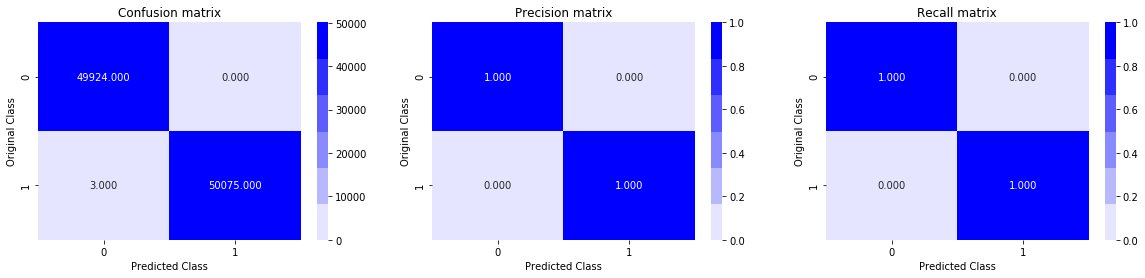

Test confusion_matrix


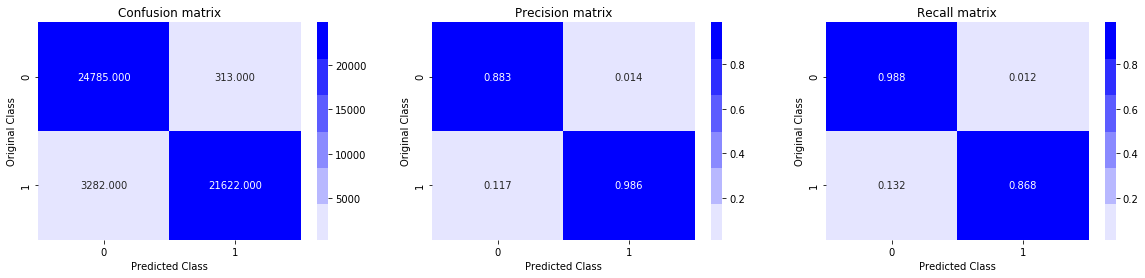

In [27]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

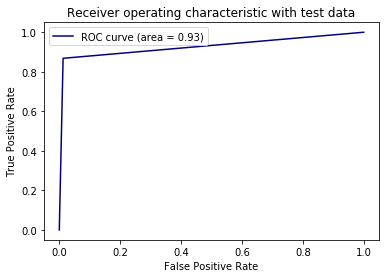

In [28]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

# **Conclusion:**


As per assignment , a feature called Preferential Attachment with followers and followees data of vertex was calculated and added. Another feature SVD_DOT was added to the dataframe.Hyperparameter tuning was done on XGBoost and model was fit with optimal parameters. Error metrics are calculated.
